In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.utils import np_utils
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
DATADIR = 'Natural' #Dataset directory
CATEGORIES = ["Person", "Motorbike", "Fruit", "Dog", "Cat", "Car"] #The things to be classify
IMG_SIZE = 100 
batch_size = 55
epochs = 5

In [3]:
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:  # do 
        path = os.path.join(DATADIR,category)  # create path 
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2, 3, 4 or 5)
        for img in os.listdir(path):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)  # add this to our training_data
                labels.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass


create_training_data()

In [4]:
objects=np.array(training_data)
labels=np.array(labels)

In [5]:
np.save("objects",objects)
np.save("labels",labels)

In [6]:
objects=np.load("objects.npy")
labels=np.load("labels.npy")

In [7]:
s=np.arange(objects.shape[0])
np.random.shuffle(s)
objects=objects[s]
labels=labels[s]

In [8]:
num_classes=len(np.unique(labels))
data_length=len(objects)

In [9]:
(x_train,x_test)=objects[(int)(0.1*data_length):],objects[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

In [10]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

In [11]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
#One hot encoding
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [13]:
#make model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(100, 100, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [14]:
earlystop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          )

checkpoint = ModelCheckpoint('fullModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_split=0.3, callbacks=[earlystop, checkpoint])

Train on 6933 samples, validate on 2972 samples
Epoch 1/5
6933/6933 [==============================] - 25s 4ms/step - loss: 1.0660 - accuracy: 0.5508 - val_loss: 0.7037 - val_accuracy: 0.7069

Epoch 00001: val_loss improved from inf to 0.70372, saving model to fullModel.h5
Epoch 2/5
6933/6933 [==============================] - 25s 4ms/step - loss: 0.6374 - accuracy: 0.7296 - val_loss: 0.6142 - val_accuracy: 0.7527

Epoch 00002: val_loss improved from 0.70372 to 0.61421, saving model to fullModel.h5
Epoch 3/5
6933/6933 [==============================] - 26s 4ms/step - loss: 0.5402 - accuracy: 0.7724 - val_loss: 0.4998 - val_accuracy: 0.7924

Epoch 00003: val_loss improved from 0.61421 to 0.49981, saving model to fullModel.h5
Epoch 4/5
6933/6933 [==============================] - 25s 4ms/step - loss: 0.4772 - accuracy: 0.7969 - val_loss: 0.4161 - val_accuracy: 0.8170

Epoch 00004: val_loss improved from 0.49981 to 0.41615, saving model to fullModel.h5
Epoch 5/5
6933/6933 [===============

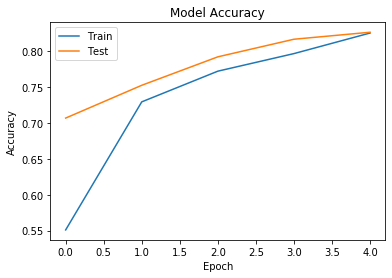

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Predicting .................................
1/1 [==============================] - 0s 39ms/step
[[1.1012151e-02 4.6924895e-05 1.3768017e-05 1.3928838e-01 8.4509224e-01
  4.5465282e-03]]
4
Cat
The predicted Object is a Cat with accuracy =    0.84509224


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[9.9658847e-01 3.1815835e-05 6.5716081e-06 9.9153927e-05 9.8087612e-06
  3.2641229e-03]]
0
Person
The predicted Object is a Person with accuracy =    0.99658847


Predicting .................................
1/1 [==============================] - 0s 3ms/step
[[3.7458292e-04 4.4875178e-02 3.1046732e-03 6.1669354e-03 4.0645339e-03
  9.4141412e-01]]
5
Car
The predicted Object is a Car with accuracy =    0.9414141


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[7.7218097e-03 1.3615955e-04 6.0487019e-07 6.6862494e-01 3.2285678e-01
  6.5973919e-04]]
3
Dog
The predicted Object is a Dog with accuracy =    0.66862494


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[1.1349097e-10 9.9991405e-01 3.6048000e-08 3.2358224e-07 3.3719121e-07
  8.5199252e-05]]
1
Motorbike
The predicted Object is a Motorbike with accuracy =    0.99991405


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[1.1349097e-10 9.9991405e-01 3.6048000e-08 3.2358224e-07 3.3719121e-07
  8.5199252e-05]]
1
Motorbike
The predicted Object is a Motorbike with accuracy =    0.99991405


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[1.7419819e-06 3.6073817e-04 1.5497674e-06 3.5041034e-05 1.0867154e-04
  9.9949229e-01]]
5
Car
The predicted Object is a Car with accuracy =    0.9994923


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[9.6853739e-01 9.8255841e-05 4.5934053e-06 2.4074998e-02 6.7572258e-03
  5.2749156e-04]]
0
Person
The predicted Object is a Person with accuracy =    0.9685374


Predicting .................................
1/1 [==============================] - 0s 2ms/step
[[0.26783484 0.02556684 0.35370925 0.04684595 0.2862791  0.019764  ]]
2
Fruit
The predicted Object is a Fruit with accuracy =    0.35370925
